# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1) #10k test set also 10%

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

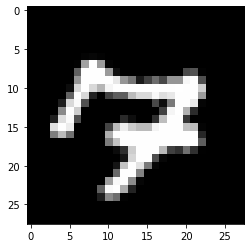

In [6]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(train_x[0,:],(28,28)), cmap='gray')
plt.imshow(np.reshape(train_x[1,:],(28,28)), cmap='gray')


### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [7]:
#define models
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
naivebayes=GaussianNB()
naivebayes.fit(train_x,train_y)

naivebayes_predicted = naivebayes.predict(train_x)

accuracy_score(train_y,naivebayes_predicted)

0.5564761904761905

In [9]:
confusion_matrix(train_y,naivebayes_predicted)

array([[5494,   11,   30,   19,   12,   16,  177,    4,  254,  142],
       [   4, 6729,   14,   30,    3,   12,   78,    3,  160,   76],
       [ 558,  178, 1815,  496,   30,   28, 1580,   17, 1437,  119],
       [ 332,  329,   54, 2346,   10,   15,  298,   53, 2237,  765],
       [ 151,   41,   48,   32,  991,   36,  547,   25, 1237, 3041],
       [ 621,  150,   30,  129,   25,  300,  300,   10, 3446,  684],
       [  50,  107,   28,    2,    5,   23, 5825,    0,  131,    9],
       [  25,   45,    9,   54,   52,    6,   21, 1910,  187, 4245],
       [  97,  803,   23,   55,   22,   35,  101,    9, 3672, 1346],
       [  33,   33,   20,   12,   28,    3,    4,   79,  106, 5976]],
      dtype=int64)

In [10]:
linear=linear_model.SGDClassifier(loss='log')
linear.fit(train_x,train_y)
linear_predicted = linear.predict(train_x)
accuracy_score(train_y,linear_predicted)

0.8911111111111111

In [11]:
confusion_matrix(train_y,linear_predicted)

array([[5680,    1,   15,  175,   10,   35,   38,    3,  123,   79],
       [   1, 6912,   29,   59,    8,   26,   11,    6,   39,   18],
       [  10,   46, 5262,  339,   79,   32,  116,   35,  290,   49],
       [   3,   10,   56, 6065,   14,  107,   13,   20,   58,   93],
       [   1,   12,   14,   23, 5846,    9,   31,    4,   34,  175],
       [  14,   17,   24,  463,  100, 4711,  112,   17,  136,  101],
       [  20,    7,   14,   24,   57,  111, 5893,    3,   40,   11],
       [  11,   18,   29,  198,   98,   26,    9, 5390,   38,  737],
       [  12,   62,   27,  651,   78,  282,   40,   14, 4671,  326],
       [  14,   15,    8,  169,  234,   49,    3,   69,   23, 5710]],
      dtype=int64)

In [12]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(train_x)
accuracy_score(train_y,rf_predicted)

0.9991904761904762

In [13]:
confusion_matrix(train_y,rf_predicted)

array([[6159,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 7103,    3,    0,    0,    0,    0,    0,    3,    0],
       [   0,    0, 6257,    0,    0,    0,    0,    1,    0,    0],
       [   2,    1,    1, 6433,    0,    0,    0,    0,    1,    1],
       [   0,    0,    0,    0, 6146,    0,    0,    0,    1,    2],
       [   0,    0,    0,    0,    1, 5693,    0,    0,    1,    0],
       [   1,    1,    1,    0,    0,    3, 6174,    0,    0,    0],
       [   2,    0,    3,    2,    1,    0,    0, 6545,    1,    0],
       [   0,    1,    3,    0,    4,    0,    1,    0, 6154,    0],
       [   2,    1,    1,    1,    2,    1,    0,    1,    0, 6285]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [14]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [15]:
naivebayes_acc=accuracy_score(test_y,naivebayes.predict(test_x))
naivebayes_f1=f1_score(test_y,naivebayes.predict(test_x),average='micro')

linear_acc=accuracy_score(test_y,linear.predict(test_x))
linear_f1=f1_score(test_y,linear.predict(test_x),average='micro')

rf_acc=accuracy_score(test_y,rf.predict(test_x))
rf_f1=f1_score(test_y,rf.predict(test_x),average='micro')

In [16]:
naivebayes_acc

0.5562857142857143

In [17]:
naivebayes_f1

0.5562857142857143

In [18]:
linear_acc

0.8775714285714286

In [19]:
linear_f1

0.8775714285714286

In [20]:
rf_acc

0.9501428571428572

In [21]:
rf_f1

0.9501428571428572

In [29]:
from sklearn.metrics import *


y_five = test_y=='5' #get bool lables=='5' - NOTE original lables are strings!
bayes_five = naivebayes.predict(test_x).astype(int)==5 #get bool for predictions - cast to int because predictions are uint
linear_five = linear.predict(test_x).astype(int)==5
rf_five = rf.predict(test_x).astype(int)==5

bayes_fpr, bayes_tpr, _ = roc_curve(y_five, bayes_five)
bayes_roc_auc = auc(bayes_fpr, bayes_tpr)
linear_fpr, linear_tpr, _ = roc_curve(y_five, linear_five)
linear_roc_auc = auc(linear_fpr, linear_tpr)
rf_fpr, rf_tpr, _ = roc_curve(y_five, rf_five)
rf_roc_auc = auc(rf_fpr, rf_tpr)


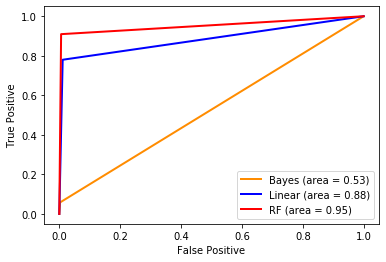

In [34]:
lw = 2
plt.plot(bayes_fpr, bayes_tpr, color='darkorange',
         lw=lw, label='Bayes (area = %0.2f)' % bayes_roc_auc)
plt.plot(linear_fpr, linear_tpr, color='blue',
         lw=lw, label='Linear (area = %0.2f)' % linear_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=lw, label='RF (area = %0.2f)' % rf_roc_auc)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="best")
plt.show()